In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
G = nx.DiGraph()

# VERDES
G.add_node(245, demand = 5, color='blue', bipartite=1)
G.add_node(299, demand = -5, color='red', bipartite=0)
G.add_edge(245, 299, weight= 0, capacity = 25, color='green' )

G.add_node(260, demand = 5, color='blue', bipartite=1)
G.add_node(314, demand = -5, color='red', bipartite=0)
G.add_edge(260, 314, weight= 0, capacity = 25, color='green' )

G.add_node(289, demand = 5, color='blue', bipartite=0)
G.add_node(343, demand = -5, color='red', bipartite=1)
G.add_edge(289, 343, weight= 0, capacity = 25, color='green' )

G.add_node(304, demand = 5, color='blue', bipartite=0)
G.add_node(358, demand = -5, color='red', bipartite=1)
G.add_edge(304, 358, weight= 0, capacity = 25, color='green' )

# ROJO
G.add_edge(358, 245, weight= 1, capacity = 20, color='red' )
G.add_edge(314, 289, weight= 1, capacity = 20, color='red' )

# AZUL
G.add_edge(245, 260, weight= 0, capacity = 25, color='blue' )
G.add_edge(260, 343, weight= 0, capacity = 25, color='blue' )
G.add_edge(343, 358, weight= 0, capacity = 25, color='blue' )

G.add_edge(289, 299, weight= 0, capacity = 25, color='blue' )
G.add_edge(299, 304, weight= 0, capacity = 25, color='blue' )
G.add_edge(304, 314, weight= 0, capacity = 25, color='blue' )


# Calcular el flujo de costo mínimo
flow_dict = nx.min_cost_flow(G)
print(flow_dict)

{245: {299: 0, 260: 5}, 299: {304: 5}, 260: {314: 0, 343: 0}, 314: {289: 5}, 289: {343: 0, 299: 0}, 343: {358: 5}, 304: {358: 0, 314: 0}, 358: {245: 10}}


{314: (0, 0), 304: (0, 1), 299: (0, 2), 289: (0, 3), 358: (1, 0), 343: (1, 1), 260: (1, 2), 245: (1, 3)}


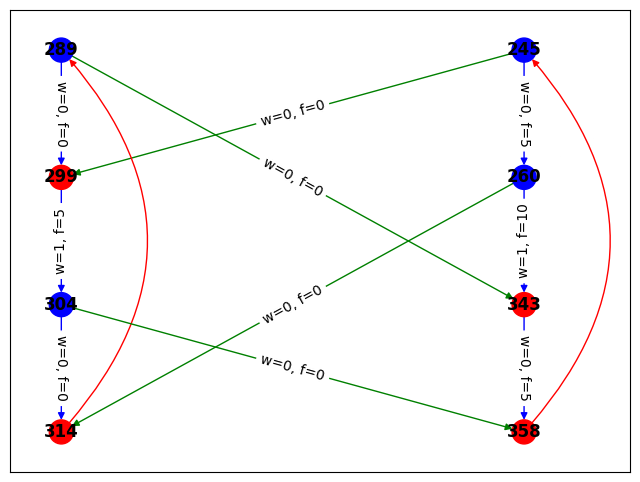

{245: {299: 0, 260: 5}, 299: {304: 5}, 260: {314: 0, 343: 0}, 314: {289: 5}, 289: {343: 0, 299: 0}, 343: {358: 5}, 304: {358: 0, 314: 0}, 358: {245: 10}}


In [3]:
# Crear etiquetas para los bordes que muestren peso y flujo
edge_labels = {(u, v): f"w={d['weight']}, f={flow_dict[u][v]}" 
               for u, v, d in G.edges(data=True)}

# Asignar colores a los nodos y bordes
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Definir la disposición manualmente para un layout bipartito ordenado
pos = {}
izq = [314, 304, 299, 289]
der = [358, 343, 260, 245]

# Asignar posiciones en el eje x (columna 0 para izq y columna 1 para der)
for i, node in enumerate(izq):
    pos[node] = (0, i)
for i, node in enumerate(der):
    pos[node] = (1, i)

print(pos)
# Definir qué aristas deben tener curva
edges_with_curves = [(314, 289), (358, 245)]  # Especificar aristas con curva aquí
edge_styles = ['arc3, rad=0.45' if (u, v) in edges_with_curves else 'arc3, rad=0' for u, v in G.edges()]

# Dibujar nodos
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)

# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_weight='bold')

# Dibujar bordes con y sin curva
for (u, v), style in zip(G.edges(), edge_styles):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[G[u][v]['color']], connectionstyle=style)

# Dibujar etiquetas de los bordes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
print(flow_dict)

{245: {299: 0, 260: 5}, 299: {304: 5}, 260: {314: 0, 343: 0}, 314: {289: 5}, 289: {343: 0, 299: 0}, 343: {358: 5}, 304: {358: 0, 314: 0}, 358: {245: 10}}


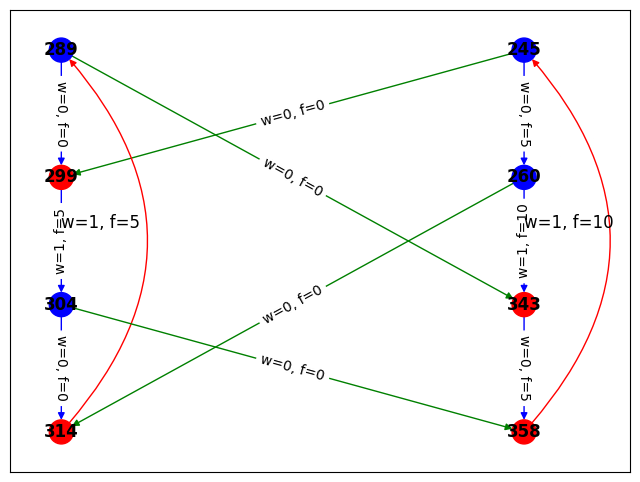

{245: {299: 0, 260: 5}, 299: {304: 5}, 260: {314: 0, 343: 0}, 314: {289: 5}, 289: {343: 0, 299: 0}, 343: {358: 5}, 304: {358: 0, 314: 0}, 358: {245: 10}}


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# VERDES
G.add_node(245, demand=5, color='blue', bipartite=1)
G.add_node(299, demand=-5, color='red', bipartite=0)
G.add_edge(245, 299, weight=0, capacity=25, color='green')

G.add_node(260, demand=5, color='blue', bipartite=1)
G.add_node(314, demand=-5, color='red', bipartite=0)
G.add_edge(260, 314, weight=0, capacity=25, color='green')

G.add_node(289, demand=5, color='blue', bipartite=0)
G.add_node(343, demand=-5, color='red', bipartite=1)
G.add_edge(289, 343, weight=0, capacity=25, color='green')

G.add_node(304, demand=5, color='blue', bipartite=0)
G.add_node(358, demand=-5, color='red', bipartite=1)
G.add_edge(304, 358, weight=0, capacity=25, color='green')

# ROJO
G.add_edge(358, 245, weight=1, capacity=20, color='red')
G.add_edge(314, 289, weight=1, capacity=20, color='red')

# AZUL
G.add_edge(245, 260, weight=0, capacity=25, color='blue')
G.add_edge(260, 343, weight=0, capacity=25, color='blue')
G.add_edge(343, 358, weight=0, capacity=25, color='blue')

G.add_edge(289, 299, weight=0, capacity=25, color='blue')
G.add_edge(299, 304, weight=0, capacity=25, color='blue')
G.add_edge(304, 314, weight=0, capacity=25, color='blue')

# Calcular el flujo de costo mínimo
flow_dict = nx.min_cost_flow(G)
print(flow_dict)

# Crear etiquetas para los bordes que muestren peso y flujo
edge_labels = {(u, v): f"w={d['weight']}, f={flow_dict[u][v]}" for u, v, d in G.edges(data=True)}

# Asignar colores a los nodos y bordes
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Definir la disposición manualmente para un layout bipartito ordenado
pos = {}
izq = [314, 304, 299, 289]
der = [358, 343, 260, 245]

# Asignar posiciones en el eje x (columna 0 para izq y columna 1 para der)
for i, node in enumerate(izq):
    pos[node] = (0, i)
for i, node in enumerate(der):
    pos[node] = (1, i)

# Definir qué aristas deben tener curva
edges_with_curves = [(314, 289), (358, 245)]  # Especificar aristas con curva aquí
edge_styles = ['arc3, rad=0.45' if (u, v) in edges_with_curves else 'arc3, rad=0' for u, v in G.edges()]

# Dibujar nodos
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)

# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_weight='bold')

# Dibujar bordes con y sin curva
for (u, v), style in zip(G.edges(), edge_styles):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[G[u][v]['color']], connectionstyle=style)

# Dibujar etiquetas de los bordes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Ajustar la posición de las etiquetas de los bordes curvados
label_pos_adjust = {}
for (u, v) in edges_with_curves:
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    label_pos_adjust[(u, v)] = ((x1 + x2) / 2, (y1 + y2) / 2 + 0.1)

# Dibujar etiquetas manualmente para bordes con curvas
for (u, v), (x, y) in label_pos_adjust.items():
    plt.text(x, y, edge_labels[(u, v)], fontsize=12, ha='left')

plt.show()
print(flow_dict)


In [256]:
G[289].values()


ValuesView(AtlasView({343: {'weight': 0, 'capacity': 25, 'color': 'green'}, 299: {'weight': 0, 'capacity': 25, 'color': 'blue'}}))

In [257]:
def get_node_name(time:int,station:str):
    name = str(time)
    while len(name) < 4:
        name = '0' + name
    return name +"_" +station[:2]

get_node_name(342,"Retiro")

'0342_Re'

In [258]:
def sort_nodes(nodes:list):
    sorted_nodes = []
    print("ASD",nodes)
    for i in range(len(nodes)):
        print(nodes[i])
        value = int(nodes[i][:4])
        sorted_nodes.append(value)
    sorted_nodes.sort()
    for i in range(len(sorted_nodes)):
        sorted_nodes[i] = get_node_name(sorted_nodes[i],nodes[i][5:])
    return sorted_nodes

In [4]:
import json
def getPos(filename:str):

	data = None
	
	with open(filename) as json_file:
		data = json.load(json_file)
		json_file.close()
	
	servicios:dict = data["services"]
	pos = {}
	for i, estacion in enumerate(data["stations"]):
		columna = []
		for key, value in servicios.items():
			
			if value["stops"][0]["station"] == estacion:
					name_value = get_node_name(value["stops"][0]["time"],value["stops"][0]["station"])
					columna.append(name_value)
			if value["stops"][1]["station"] == estacion:
					name_value = get_node_name(value["stops"][1]["time"],value["stops"][1]["station"])
					columna.append(name_value)
		columna = sort_nodes(columna)
		
		for j, value in enumerate(columna):
			pos[value] = (i,j)
	print(pos)
			
	 	 		
	 
getPos(flow_dict, "../instances/toy_instance.json", G)
	
    

TypeError: getPos() takes 1 positional argument but 3 were given

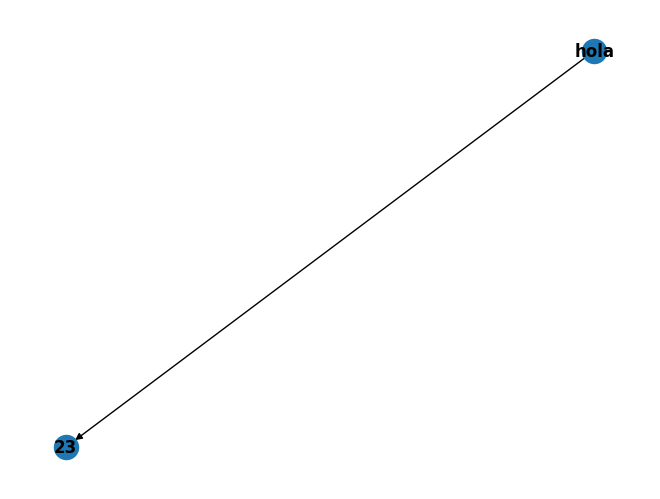

In [ ]:
G2 = nx.DiGraph()
G2.add_node("hola", demand = 5, color='blue', bipartite=1)
G2.add_node(23, demand = -5, color='red', bipartite=0)

G2.add_edge("hola", 23, weight= 0, capacity = 25, color='green' )

# simple graph
nx.draw(G2, with_labels=True, font_weight='bold')
plt.show()

In [261]:
def printGraph(G,filename,flow_dict):
	# Crear etiquetas para los bordes que muestren peso, capacidad y flujo
	edge_labels = {(u, v): f"w={d['weight']}, c={d['capacity']}, f={flow_dict[u][v]}"
				for u, v, d in G.edges(data=True)}
	# Asignar colores a los nodos y bordes
	node_colors = [G.nodes[node]['color'] for node in G.nodes()]
	edge_colors = [G[u][v]['color'] for u, v in G.edges()]
	
	edges_with_curves = [("0314_Re", "0289_Re"), ("0358_Ti", "0245_Ti")]  # Especificar aristas con curva aquí
	edge_styles = ['arc3, rad=0.45' if (u, v) in edges_with_curves else 'arc3, rad=0' for u, v in G.edges()]


	pos = getPos(filename)
	
	plt.figure(figsize=(8, 6))
	nx.draw_networkx_nodes(G, pos, node_color=node_colors)
	nx.draw_networkx_labels(G, pos, font_weight='bold')
	nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
	for (u, v), style in zip(G.edges(), edge_styles):
	    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[G[u][v]['color']], connectionstyle=style)
	plt.show()

In [20]:
import json
import random

def generate_random_json(
        num_services=20, 
        num_stations=2, 
        max_time=1440, 
        demand_value=500, 
        capacity=100, 
        max_rs=25,
        seed = 40,
        time_beetween_services = 58,
        cost_per_unit = 1.0
        
        ):
    
    random.seed(seed)
    stations = [f"Station_{i}" for i in range(num_stations)]
    services = {}
    
    for service_id in range(1, num_services + 1):
        stops = []
        time = random.randint(0, max_time - time_beetween_services)
        stationD = random.choice(stations)
        stationA = random.choice(stations)
        while stationD == stationA:
            stationA = random.choice(stations)
        stop = {
            "time": time,
            "station": stationD,
            "type": "D"
        }
        stops.append(stop)
        stop = {
            "time": time + time_beetween_services,
            "station": stationA,
            "type": "A"
        }
        stops.append(stop)
        services[str(service_id)] = {
            "stops": stops,
            "demand": [np.random.randint(0.5 * demand_value, demand_value)]
        }
    
    cost_per_unit = {station: cost_per_unit for station in stations}

    data = {
        "services": services,
        "stations": stations,
        "cost_per_unit": cost_per_unit,
        "rs_info": {
            "capacity": capacity,
            "max_rs": max_rs
        }
    }
    
    return data

# Generar un JSON con la función
random_json = generate_random_json(num_services=20, num_stations=4)
print(random_json)


{'services': {'1': {'stops': [{'time': 939, 'station': 'Station_0', 'type': 'D'}, {'time': 997, 'station': 'Station_1', 'type': 'A'}], 'demand': [414]}, '2': {'stops': [{'time': 578, 'station': 'Station_1', 'type': 'D'}, {'time': 636, 'station': 'Station_2', 'type': 'A'}], 'demand': [271]}, '3': {'stops': [{'time': 567, 'station': 'Station_3', 'type': 'D'}, {'time': 625, 'station': 'Station_0', 'type': 'A'}], 'demand': [454]}, '4': {'stops': [{'time': 1080, 'station': 'Station_1', 'type': 'D'}, {'time': 1138, 'station': 'Station_0', 'type': 'A'}], 'demand': [440]}, '5': {'stops': [{'time': 1313, 'station': 'Station_1', 'type': 'D'}, {'time': 1371, 'station': 'Station_3', 'type': 'A'}], 'demand': [450]}, '6': {'stops': [{'time': 108, 'station': 'Station_1', 'type': 'D'}, {'time': 166, 'station': 'Station_2', 'type': 'A'}], 'demand': [338]}, '7': {'stops': [{'time': 232, 'station': 'Station_2', 'type': 'D'}, {'time': 290, 'station': 'Station_1', 'type': 'A'}], 'demand': [373]}, '8': {'st

In [269]:
demand = np.arange(0, 94, 1)
demand

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93])

In [274]:
from main2 import *

data = generate_random_json(num_services=20, num_stations=4)
G = generateGraph(data,(0,"Station_0"))

In [11]:
import json
import random
from datetime import datetime, timedelta

def generate_ordered_times(start_time, interval_minutes, count):
    """Genera tiempos ordenados secuenciales a partir de un tiempo de inicio y un intervalo en minutos."""
    times = []
    current_time = start_time
    for _ in range(count):
        times.append(current_time)
        current_time += timedelta(minutes=interval_minutes)
    return times

def generate_random_json(num_services=12, file_name="random_services.json"):
    # Número de servicios divididos en dos grupos (mitad y mitad para cada dirección)
    half_services = num_services // 2
    
    # Estaciones disponibles
    stations = ["Retiro", "Tigre"]
    
    # Información inicial
    data = {
        "services": {},
        "stations": stations,
        "cost_per_unit": {station: round(random.uniform(0.5, 2.0), 2) for station in stations},
        "rs_info": {
            "capacity": random.randint(50, 200),
            "max_rs": random.randint(10, 50)
        }
        
    }

    # Tiempos de partida para los servicios desde Retiro
    start_time_retiro = datetime.strptime("06:00", "%H:%M")
    interval_minutes = 16  # Intervalo de 16 minutos entre cada servicio para no superponer
    departure_times_retiro = generate_ordered_times(start_time_retiro, interval_minutes, half_services)

    # Tiempos de partida para los servicios desde Tigre
    start_time_tigre = datetime.strptime("06:30", "%H:%M")
    departure_times_tigre = generate_ordered_times(start_time_tigre, interval_minutes, half_services)

    # Generar los servicios
    for i in range(half_services):
        # Servicios desde Retiro a Tigre
        departure_time = departure_times_retiro[i]
        arrival_time = departure_time + timedelta(minutes=random.randint(60, 90))  # Tiempo aleatorio de viaje entre 60 y 90 minutos
        
        data["services"][str(i + 1)] = {
            "stops": [
                {"time": departure_time.hour * 60 + departure_time.minute, "station": "Retiro", "type": "D"},
                {"time": arrival_time.hour * 60 + arrival_time.minute, "station": "Tigre", "type": "A"}
            ],
            "demand": [random.randint(100, 1000)]
        }
    
    for i in range(half_services):
        # Servicios desde Tigre a Retiro
        departure_time = departure_times_tigre[i]
        arrival_time = departure_time + timedelta(minutes=random.randint(60, 90))  # Tiempo aleatorio de viaje entre 60 y 90 minutos
        
        data["services"][str(i + 1 + half_services)] = {
            "stops": [
                {"time": departure_time.hour * 60 + departure_time.minute, "station": "Tigre", "type": "D"},
                {"time": arrival_time.hour * 60 + arrival_time.minute, "station": "Retiro", "type": "A"}
            ],
            "demand": [random.randint(100, 1000)]
        }
    
    # Guardar los datos en un archivo JSON
    with open(file_name, 'w') as file:
        json.dump(data, file, indent=4)
    
    print(f"Archivo '{file_name}' generado con éxito.")

# Generar un archivo JSON de ejemplo
generate_random_json()

Archivo 'random_services.json' generado con éxito.


Error para x = 0: generateGraph() takes 1 positional argument but 2 were given
Error para x = 50: generateGraph() takes 1 positional argument but 2 were given
Error para x = 100: generateGraph() takes 1 positional argument but 2 were given
Error para x = 150: generateGraph() takes 1 positional argument but 2 were given
Error para x = 200: generateGraph() takes 1 positional argument but 2 were given
Error para x = 250: generateGraph() takes 1 positional argument but 2 were given
Error para x = 300: generateGraph() takes 1 positional argument but 2 were given
Error para x = 350: generateGraph() takes 1 positional argument but 2 were given
Error para x = 400: generateGraph() takes 1 positional argument but 2 were given
Error para x = 450: generateGraph() takes 1 positional argument but 2 were given
Error para x = 500: generateGraph() takes 1 positional argument but 2 were given
Error para x = 550: generateGraph() takes 1 positional argument but 2 were given
Error para x = 600: generateGra

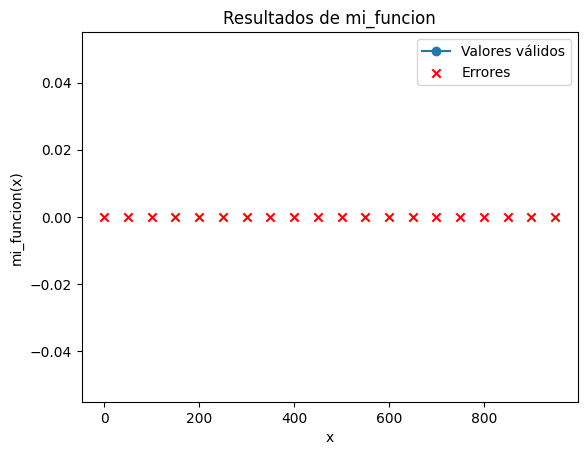

In [24]:
import matplotlib.pyplot as plt
from main_alu import *




def generate_random_json(
        num_services=8, 
        num_stations=2, 
        max_time=1440, # 1440 minutos === 60*24 minutos === 1 dia
        demand_value=500, 
        capacity=100, 
        max_rs=25,
        time_beetween_services = 58,
        cost_per_unit = 1.0,
        seed = 42
        ):
    
    random.seed(seed)
    stations = [f"{i}Station" for i in range(num_stations)]
    services = {}
    
    for service_id in range(1, num_services + 1):
        stops = []
        time = random.randint(0, max_time - time_beetween_services)
        stationD = random.choice(stations)
        stationA = random.choice(stations)
        while stationD == stationA:
            stationA = random.choice(stations)
        stop = {
            "time": time,
            "station": stationD,
            "type": "D"
        }
        stops.append(stop)
        stop = {
            "time": time + time_beetween_services,
            "station": stationA,
            "type": "A"
        }
        stops.append(stop)
        services[str(service_id)] = {
            "stops": stops,
            "demand": [demand_value]
        }
    
    cost_per_unit = {station: cost_per_unit for station in stations}

    data = {
        "services": services,
        "stations": stations,
        "cost_per_unit": cost_per_unit,
        "rs_info": {
            "capacity": capacity,
            "max_rs": max_rs
        }
    }
    
    return data

# Lista de valores de x que queremos probar
valores_x = range(0, 1000,50)
resultados = []

# Probar la función y capturar excepciones
REDUCCION_CAPACIDAD_TRASNOCHE = (0,"0Station")
for x in valores_x:
    try:
        data = generate_random_json(num_services=4, num_stations=2,seed=42)
        G = generateGraph(data,REDUCCION_CAPACIDAD_TRASNOCHE)
        flowDict = nx.min_cost_flow(G)
        vagones_totales(flowDict, data, G)
        costo = getFlowCost(flowDict, G)

        resultados.append((x, costo, True))  # El tercer elemento indica que no hubo error
    except Exception as e:
        print(f"Error para x = {x}: {e}")
        resultados.append((x, None, False))  # El tercer elemento indica que hubo error

# Separar los resultados válidos y los que rompieron
valores_x_validos = [x for x, res, valid in resultados if valid]
valores_y_validos = [res for x, res, valid in resultados if valid]

valores_x_invalidos = [x for x, res, valid in resultados if not valid]
valores_y_invalidos = [0 for x, res, valid in resultados if not valid]  # Poner en 0 o algún valor placeholder

# Graficar los resultados
plt.plot(valores_x_validos, valores_y_validos, marker='o', linestyle='-', label='Valores válidos')
plt.scatter(valores_x_invalidos, valores_y_invalidos, color='red', marker='x', label='Errores')

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('mi_funcion(x)')
plt.title('Resultados de mi_funcion')
plt.legend()

# Mostrar el gráfico
plt.show()


In [29]:
REDUCCION_CAPACIDAD_TRASNOCHE = (0,"0Station")

data = generate_random_json(num_services=4, num_stations=2,seed=42)
G = generateGraph(data)
flowDict = nx.min_cost_flow(G)
vagones_totales(flowDict, data, G)
costo = getFlowCost(flowDict, G)

TypeError: expected str, bytes or os.PathLike object, not dict

In [9]:

def simular_demanda(tiempo, horas_pico, demanda_pico, ancho_pico, minima_demanda):
    """
    Simula la demanda de trenes a lo largo del día.
    
    Retorna:
    - demand: Array de demanda simulada para cada hora del día.
    """
    demand = np.full_like(tiempo, minima_demanda, dtype=float)
    
    for hora, alto, ancho in zip(horas_pico, demanda_pico, ancho_pico):
        demand += alto * np.exp(-0.5 * ((tiempo - hora) / ancho) ** 2)
    
    return demand
 
 
# Configuración
time = np.linspace(0, 24, 24)  # Horas del día de 0 a 24 en intervalos finos
peak_hours = [7, 12, 19]         # Horas pico
peak_heights = [800, 900, 800]      # Altura de los picos de demanda
peak_widths = [3, 2, 3]          # Anchura de los picos (más pequeño = más agudo)
base_demand = 500                 # Demanda base mínima

# Simulación
demand = simular_demanda(time, peak_hours, peak_heights, peak_widths, base_demand)

In [10]:
print(demand)

[ 552.58283816  611.44094293  709.27147181  848.23905355 1013.75140825
 1173.41721292 1290.8423525  1353.47709634 1394.5456628  1471.42107848
 1591.54931057 1666.96248266 1594.65344864 1390.59909387 1190.55157047
 1111.59171863 1157.12222805 1248.35378222 1301.12317004 1270.74975486
 1158.87300743  999.29264932  835.27263045  699.48186589]
